In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [2]:
NL_t = 0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3

Me = 511005.0
ke = 100*1.0e6
energy = ke+Me
freq = 30*1.0e6
offset = 0.001

g = energy/Me
bg = np.sqrt(g**2-1.0)
vec = bg/g*impact.data.clight

turns = 2048

alfaEntrance = np.tan(np.pi*NL_mu)
betaEntrance = NL_L/np.sin(2.0*np.pi*NL_mu)

# Prepare beam & lattice

In [3]:
beam, lattice = impact.readInputFile('test_shifted.in')

reading ImpactZ input file (test_shifted.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
beam.current = 0.0
beam.kinetic_energy = ke
beam.mass = Me
beam.charge = -1.0
beam.frequency = freq
beam.nCore_y = 1
beam.nCore_z = 1
beam.n_particles = 1
beam.current = 0.0

In [5]:
lattice = [ item for item in lattice if not item.type == 'write_raw_ptcl' ]
lattice[0].turns = turns

In [6]:
L=0.0
for i in range(len(lattice)):
    if 'length' in lattice[i].keys():
        L = L+lattice[i].length
print(L)

39.96822971580008


# run

In [7]:
beam.distribution.offsety = offset
impact.writeInputFile(beam,lattice)
impact.run(beam)
fort82=np.loadtxt('fort.82')
X=fort82[:,1] + 1j*fort82[:,2]
Y=fort82[:,3] + 1j*fort82[:,4]

input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles


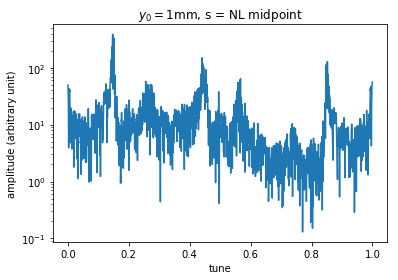

In [15]:
fft = np.fft.fft(Y)
plt.semilogy(np.arange(2048)/2048,np.abs(fft[::-1]))
plt.xlabel('tune');
plt.ylabel('amplitude (arbitrary unit)');
plt.title(r'$y_0=1$mm, s = NL midpoint');